                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Mon, 04 Mar 2024   Prob (F-statistic):              0.401
Time:                        14:01:35   Log-Likelihood:                -3510.2
No. Observations:                1192   AIC:                             7090.
Df Residuals:                    1157   BIC:                             7268.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9669      0.263     68.325      0.0

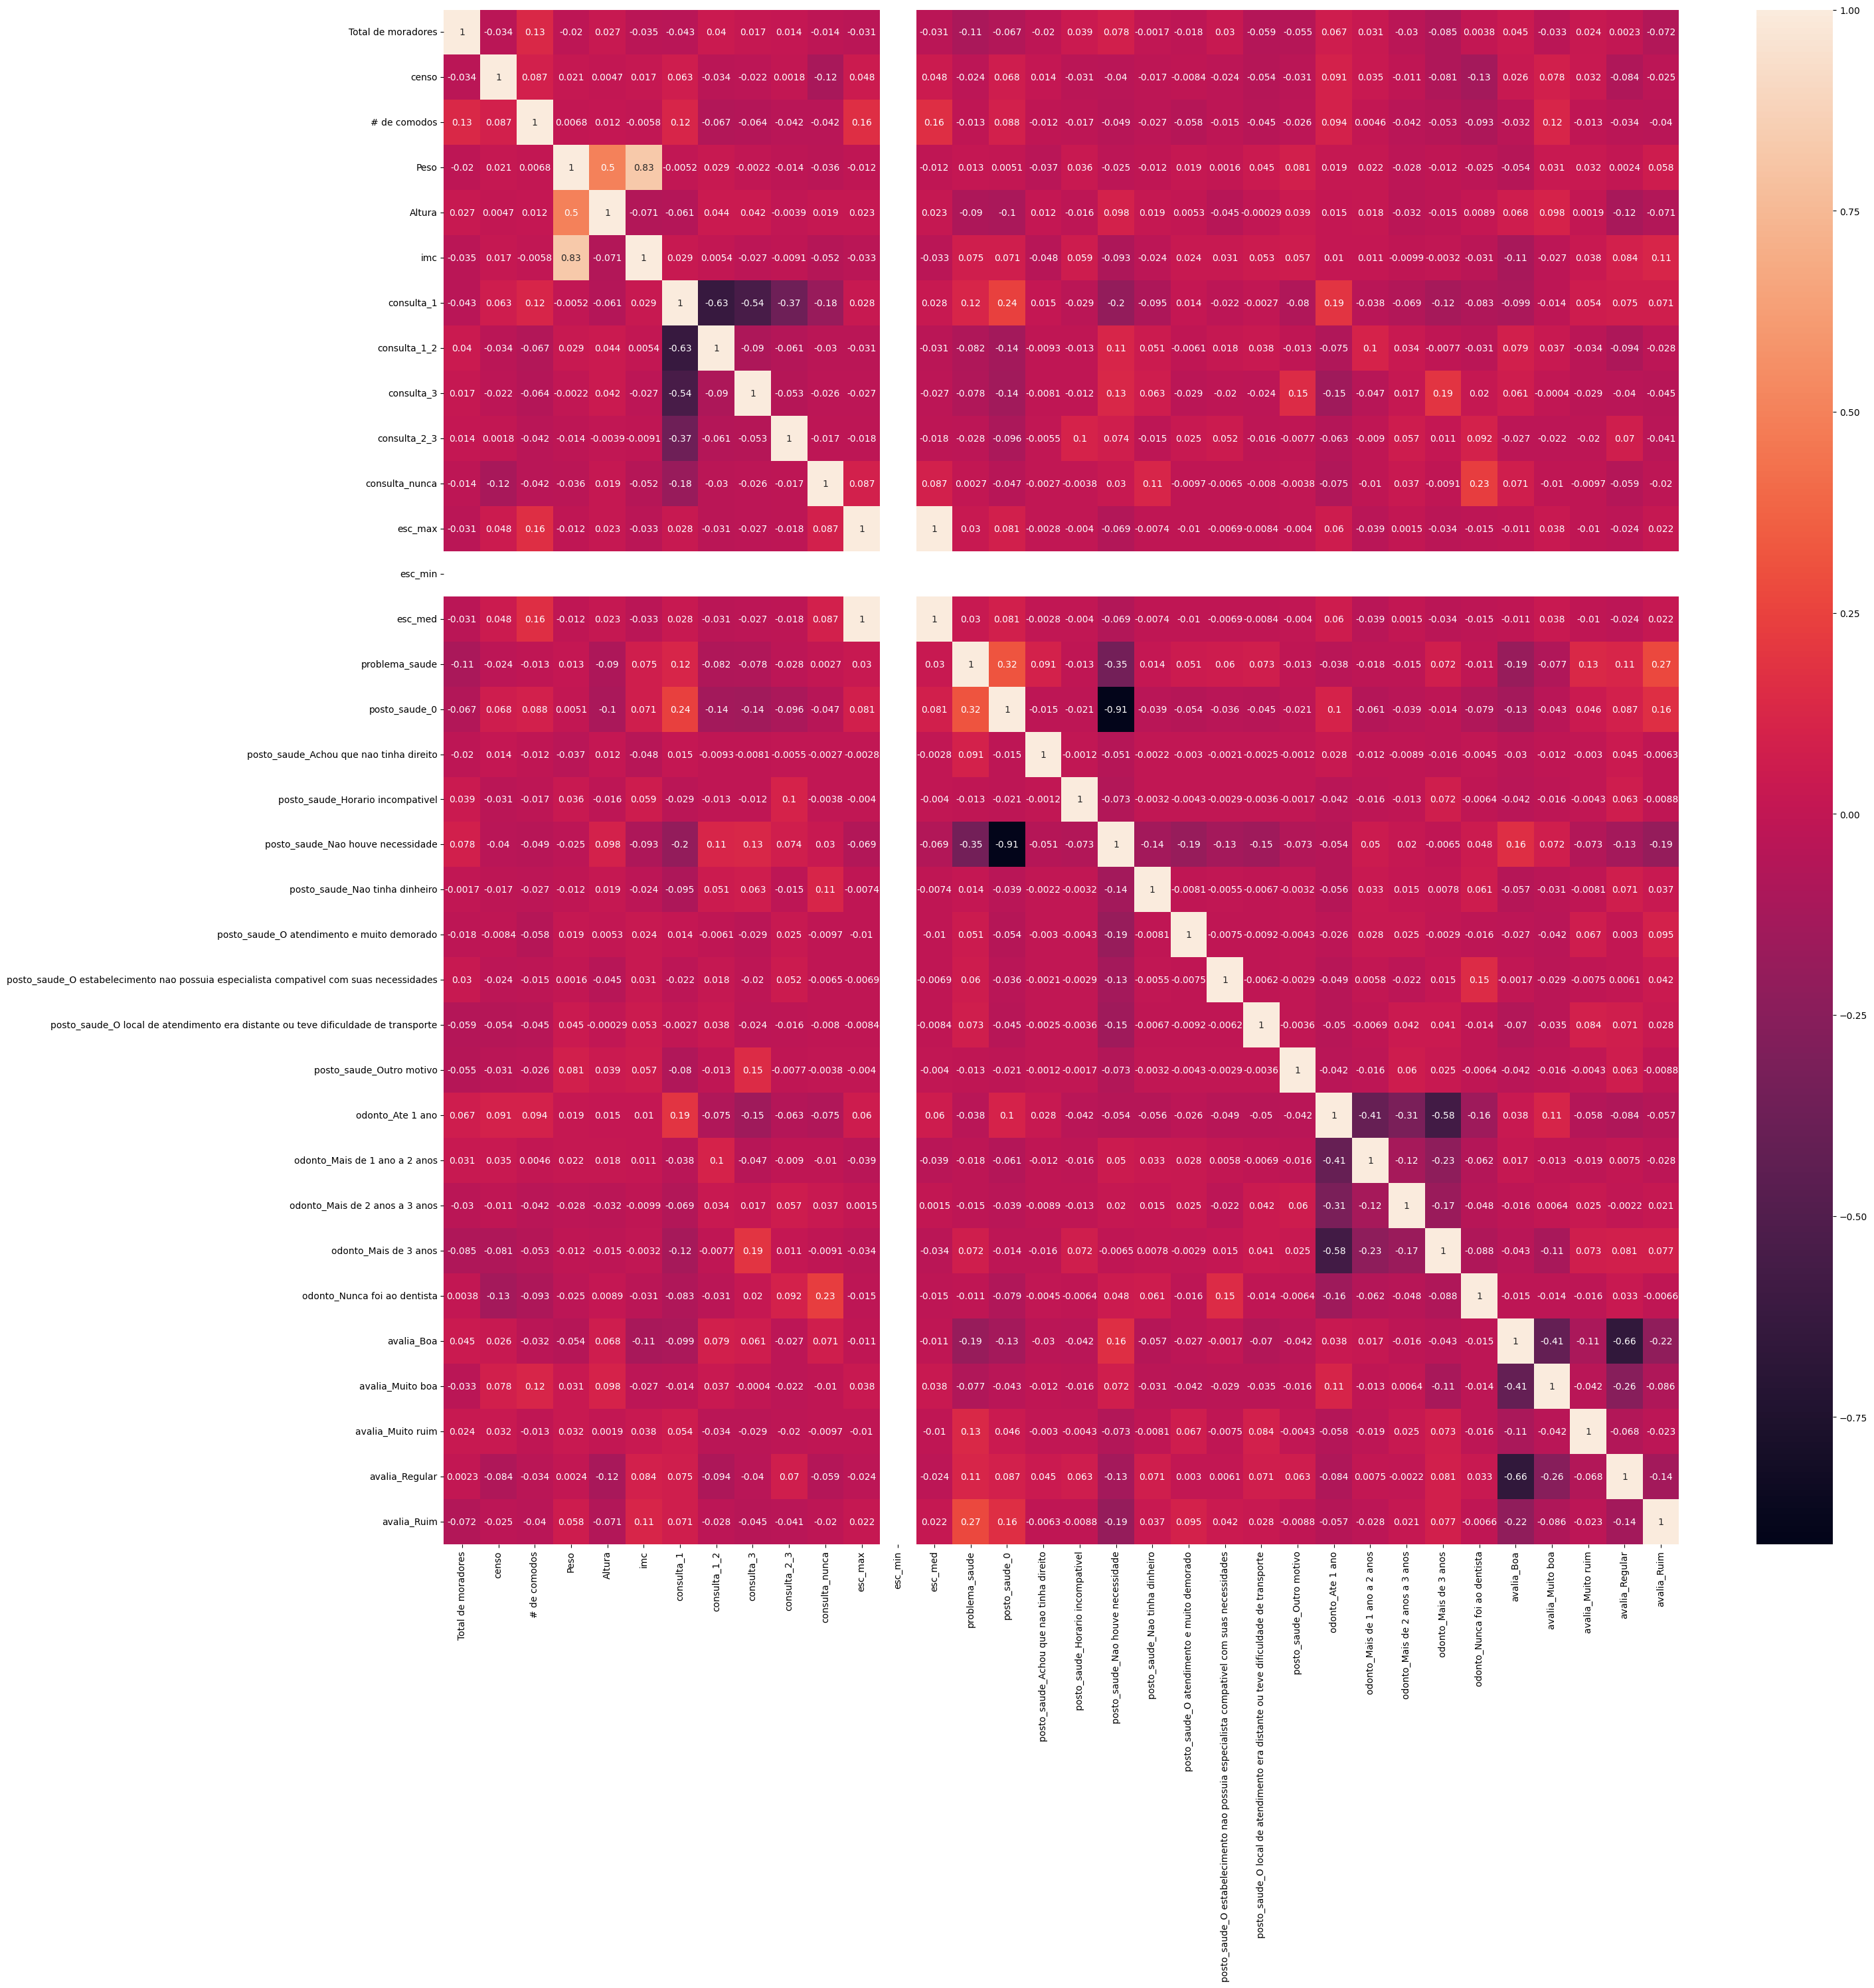

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 2/pns-novo.csv', sep='\t')
df = df.dropna(subset=['Peso','Altura'],axis=0)
df['imc'] = df['Peso'] / (df['Altura']/100 * df['Altura']/100)

# df['imc']
# df['imc'].describe()
#df.isna().sum()
#df.describe()

#print(df['Qdo teve ultima consulta medica?'].value_counts())
#print(df['Situacao censitaria'].value_counts())
# PORQUE USAR MULTIPLAS VARIÁVEIS AO CONVERTER UMA VARIÁVEL CATEGÓRICA EM VARIÁVEL BINÁRIA
# FICO SOMENTE COM 1 BETA PARA DESCREVER 4 VARIÁVEIS POSSÍVEIS
# FICO COM N BETAS (NO CASO ACIMA, 4), MEU PODER DE EXPLICAÇÃO DA REGRESSÃO SOBE
#print(df['Nas ultimas 2 semanas, pq nao foi ao posto de saude?'].value_counts())

df = df.rename(columns={'Situacao censitaria':'censo'})
df['censo'] = df.apply( lambda row: 1 if row['censo']=='Urbano' else 0 , axis=1)

df['consulta_1'] = df.apply( lambda row: 1 if row['Qdo teve ultima consulta medica?']=='Ate 1 ano' else 0 , axis=1)
df['consulta_1_2'] = df.apply( lambda row: 1 if row['Qdo teve ultima consulta medica?']=='Mais de 1 ano a 2 anos' else 0 , axis=1)
df['consulta_3'] = df.apply( lambda row: 1 if row['Qdo teve ultima consulta medica?']=='Mais de 3 anos' else 0 , axis=1)
df['consulta_2_3'] = df.apply( lambda row: 1 if row['Qdo teve ultima consulta medica?']=='Mais de 2 anos a 3 anos' else 0 , axis=1)
df['consulta_nunca'] = df.apply( lambda row: 1 if row['Qdo teve ultima consulta medica?']=='Nunca foi ao medico' else 0 , axis=1)

df['esc_max'] = df.apply(lambda row: 1 if row['Escolaridade'] in ['Superior – graduação', 'Especialização de nível superior (duração mínima de 360 horas)', 'Doutorado', 'Mestrado'] else 0, axis=1)
df['esc_min'] = df.apply(lambda row: 1 if row['Escolaridade'] in ['Antigo científico, clássico etc. (médio 2º ciclo)', 'Regular do ensino médio ou do 2º grau', 'Educação de jovens e adultos (EJA) ou supletivo do ensino médio'] else 0, axis=1)
df['esc_med'] = df.apply(lambda row: 1 if row['Escolaridade'] in ['Superior – graduação', 'Especialização de nível superior (duração mínima de 360 horas)', 'Doutorado', 'Mestrado'] else 0, axis=1)

df['problema_saude'] = df.apply( lambda row: 1 if row['Problemas de saude nas ultimas Nao semanas']=='Sim' else 0 , axis=1)

df = df.rename(columns={'Qdo teve ultima consulta odontologica?':'odonto'})
df = df.rename(columns={'Nas ultimas 2 semanas, pq nao foi ao posto de saude?':'posto_saude'})
df = df.rename(columns={'Como voce avalia a sua saude?':'avalia'})

df['odonto_1'] = df.apply( lambda row: 1 if row['odonto']=='Ate 1 ano' else 0 , axis=1)
df['odonto_2'] = df.apply( lambda row: 1 if row['odonto']=='Mais de 1 ano a 2 anos' else 0 , axis=1)
df['odonto_3'] = df.apply( lambda row: 1 if row['odonto']=='Mais de 3 anos' else 0 , axis=1)
df['odonto_4'] = df.apply( lambda row: 1 if row['odonto']=='Mais de 2 anos a 3 anos' else 0 , axis=1)
df['odonto_5'] = df.apply( lambda row: 1 if row['odonto']=='Nunca foi ao dentista' else 0 , axis=1)

df['posto_1'] = df.apply( lambda row: 1 if row['posto_saude']=='Nao houve necessidade' else 0 , axis=1)
df['posto_2'] = df.apply( lambda row: 1 if row['posto_saude']=='0' or row['posto_saude']=='Outro motivo' else 0 , axis=1)
df['posto_3'] = df.apply( lambda row: 1 if row['posto_saude']=='O atendimento e muito demorado' else 0 , axis=1)
df['posto_4'] = df.apply( lambda row: 1 if row['posto_saude']=='O local de atendimento era distante ou teve dificuldade de transporte' else 0 , axis=1)
df['posto_5'] = df.apply( lambda row: 1 if row['posto_saude']=='Nao tinha dinheiro' else 0 , axis=1)
df['posto_6'] = df.apply( lambda row: 1 if row['posto_saude']=='O estabelecimento nao possuia especialista compativel com suas necessidades' else 0 , axis=1)
df['posto_7'] = df.apply( lambda row: 1 if row['posto_saude']=='Horario incompativel' else 0 , axis=1)

df['avalia_1'] = df.apply( lambda row: 1 if row['posto_saude']=='Boa' else 0 , axis=1)
df['avalia_2'] = df.apply( lambda row: 1 if row['posto_saude']=='Regular' else 0 , axis=1)
df['avalia_3'] = df.apply( lambda row: 1 if row['posto_saude']=='Muito boa' else 0 , axis=1)
df['avalia_4'] = df.apply( lambda row: 1 if row['posto_saude']=='Ruim' else 0 , axis=1)
df['avalia_5'] = df.apply( lambda row: 1 if row['posto_saude']=='Muito ruim' else 0 , axis=1)

categorias_estados = ['Alagoas', 'Rio de Janeiro', 'Pernambuco', 'Sao Paulo',
       'Mato Grosso', 'Santa Catarina', 'Piaui', 'Rio Grande do Sul',
       'Amazonas', 'Parana', 'Para', 'Mato Grosso do Sul', 'Sergipe',
       'Amapa', 'Ceara', 'Minas Gerais', 'Roraima', 'Espirito Santo',
       'Distrito Federal', 'Rio Grande do Norte', 'Maranhao', 'Tocantins',
       'Bahia', 'Acre', 'Goias', 'Rondonia', 'Paraiba']

for categoria in categorias_estados:
    df[categoria] = df.apply(lambda row: 1 if row['Estado'] == categoria else 0, axis=1)


#df = df.dropna(how='any',axis=0)

y = df['imc'].to_numpy()
x = df[[
# 'Total de moradores',
# '# de comodos',
# 'Peso',
# 'Altura',
'consulta_1',
'consulta_1_2',
'consulta_3',
'consulta_2_3',
'consulta_nunca',
# 'esc_max',
#'esc_min',
#'esc_med',
# 'posto_1',
# 'posto_2',
# 'posto_3',
# 'posto_4',
# 'posto_5',
# 'posto_6',
# 'posto_7',
'odonto_1',
'odonto_2',
'odonto_3',
'odonto_4',
'odonto_5',
'Alagoas', 'Rio de Janeiro', 'Pernambuco', 'Sao Paulo',
       'Mato Grosso', 'Santa Catarina', 'Piaui', 'Rio Grande do Sul',
       'Amazonas', 'Parana', 'Para', 'Mato Grosso do Sul', 'Sergipe',
       'Amapa', 'Ceara', 'Minas Gerais', 'Roraima', 'Espirito Santo',
       'Distrito Federal', 'Rio Grande do Norte', 'Maranhao', 'Tocantins',
       'Bahia', 'Acre', 'Goias', 'Rondonia', 'Paraiba'
# 'avalia_1',
# 'avalia_2',
# 'avalia_3',
# 'avalia_4',
# 'avalia_5'
]].to_numpy()

# COLINEARIDADE
# É UMA DAS PRECONDIÇÕES QUE IMPOSSIBILITAM OU PREJUDICAM O "ENCAIXE" DO MEU MODELO DE REGRESSÃO LINEAR

model = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)
model.fit(x, y)

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

# Modelo do teste de hipóteses
# H0 => Hipótese Nula
# H1 => Hipótese Alternativa

# INDUSTRIA:
# H0 => CONDIÇÃO ESPERADA => MÁQUINA FUNCIONA PERFEITAMENTE
# H1 => MÁQUINA NÃO FUNCIONA

# MEDICA
# H0 => MEU MEDICAMENTO NAO INFLUENCIA NO PACIENTE
# H1 => MEU MEDICAMENTO ALTEROU ALGO NO PACIENTE

# ALPHA => GRAU DE SIGNIFICANCIA ESTATÍSTICA
# H1 É VÁLIDO COM SIGNIFICANCIA ESTATÍSTICA DE 95% 5%

# TESTE HIPÓTESES EU TRABALHO COM AMOSTRAS
# AMOSTRA É UMA REPRESENTAÇÃO DA POPULAÇÃO
# 1% OU DE 10%

# P_VALOR
# P_VALOR É MAIOR QUE O MEU GRAU DE SIGNIFICÂNCIA (ALPHA) SIGNIFICA QUE H0 É VÁLIDO
# P_VALOR É MENOR QUE O MEU GRAU DE SIGNIFICÂNCIA (ALPHA) SIGNIFICA QUE H1 É VÁLIDO

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

#
# QUALQUER P_VALOR > 0.1 (10%)
# H0: COEFICIENTE É IGUAL ZERO
# H1: COEFICIENTE É DIFERENTE DE ZERO

# 1.788e-14 == 0.00000000000001788
# X11 == ESCOLARIDADE MÉDIA 0|1
#
# IMC
# 26 == 26.00000000000001788
#

# TESTE-F
# H0: DIZ QUE A MINHA REGRESSÃO É IGUAL ZERO
# H1: DIZ QUE A MINHA REGRESSÃO É DIFERENTE DE ZERO

# Y = BETA0 + E